In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

pd.set_option('display.max.columns', 50)

In [32]:
df = pd.read_csv("medical_examination.csv")

In [33]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# Add 'overweight' column

In [34]:
df['height_meters'] = df['height'] / 100
df['BMI'] = df['weight'] / (df['height_meters'] ** 2)

In [50]:
df['overweight'] = df['BMI'].apply(lambda x: 1 if x > 25 else 0)

In [52]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_meters,BMI,Overweight,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1.68,21.967120,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.56,34.927679,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1.65,23.507805,0,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.69,28.710479,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1.56,23.011177,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1.68,26.927438,1,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1.58,50.472681,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1.83,31.353579,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1.63,27.099251,1,1


# Draw Categorical Plot

In [61]:
def draw_cat_plot():
        # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
        df_cat = pd.melt(df, id_vars = 'cardio', var_name = 'variable', value_vars = ['alco', 'active','cholesterol', 'gluc', 'overweight','smoke'])
        
        # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
        df_cat = pd.melt(df, var_name = 'variable', value_vars = ['active','alco','cholesterol', 'gluc','overweight','smoke'], id_vars = 'cardio')
        
        # Draw the catplot with 'sns.catplot()'
        fig = sns.catplot(data=df_cat, kind="count",  x="variable",hue="value", col="cardio").set_axis_labels("variable", "total")
        fig = fig.fig
        
        fig.savefig('catplot.png')
        return fig
        

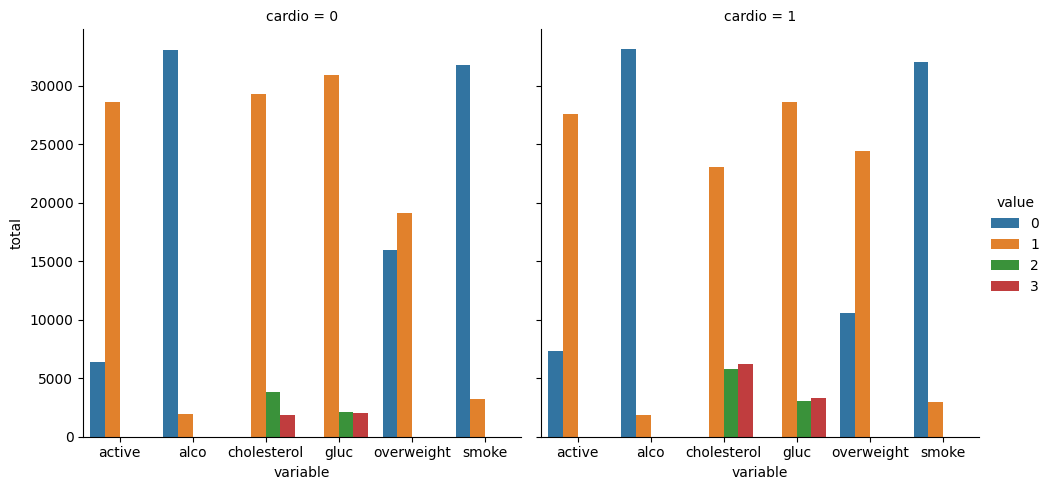

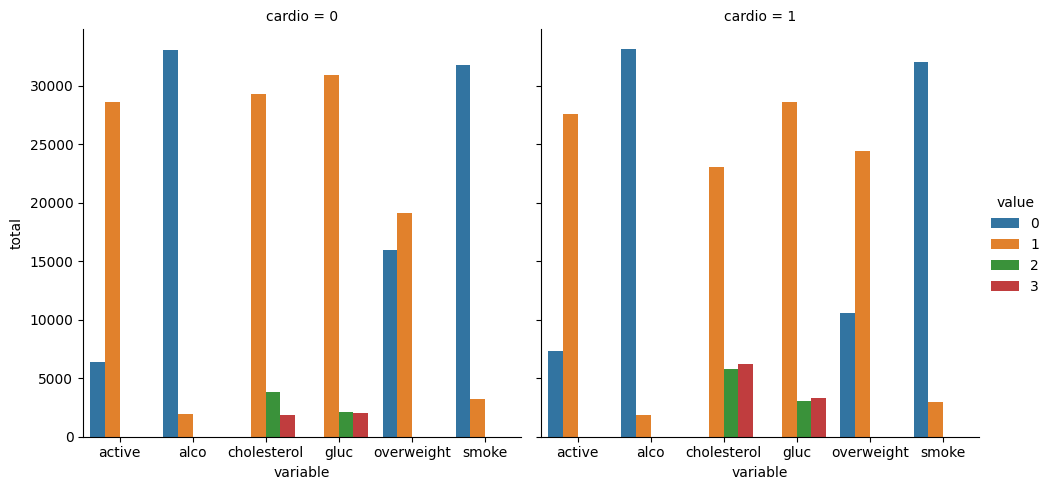

In [62]:
draw_cat_plot()